# Wikipedia Network
Scrape all wikipedia links on a seed Wikipedia page to build a directed network where each node is a wiki page and each edge is a link

In [12]:
# original implementation using list and pop(0) 7m 43s for d=2
import requests
from bs4 import BeautifulSoup
import networkx as nx

url_cache = {str: {str}}

def fetch_page_wiki_links(url: str) -> set[str]:
    if url in url_cache:
        return url_cache[url]
    try:
        response = requests.get(url, timeout=10)
    except:
        return set()

    if response.ok:
        links = set()
        soup = BeautifulSoup(response.content, 'html.parser')
        a_tags = soup.find_all('a', href=True)
        for tag in a_tags:
            href = tag['href']
            if href.startswith('/wiki/') and ':' not in href:
                links.add(f"https://en.wikipedia.org{href}")
        # cache set of links
        url_cache[url] = links
        return links
        
def build_wikipedia_network(seed_url, max_depth=1):
    G = nx.DiGraph()
    queue = [(seed_url, 0)]

    while queue:
        current_url, depth = queue.pop(0)

        if depth > max_depth:
            break
        else:
            links = fetch_page_wiki_links(current_url)
            for link in links:
                G.add_edge(current_url, link)
                queue.append((link, depth + 1))

    return G

In [77]:
# recursive implementation 6m 9s for d=2
import requests
from bs4 import BeautifulSoup
import networkx as nx
from collections import deque 

url_cache = {str : {str}}

def fetch_page_wiki_links(url: str) -> set[str]:
    if url in url_cache:
        return url_cache[url]
    try:
        response = requests.get(url, timeout=10)
    except:
        return set()

    if response.ok:
        links = set()
        soup = BeautifulSoup(response.content, 'html.parser')
        a_tags = soup.find_all('a', href=True)
        for tag in a_tags:
            href = tag['href']
            if href.startswith('/wiki/') and ':' not in href:
                links.add(f"https://en.wikipedia.org{href}")
        # cache set of links
        url_cache[url] = links
        return links
        
def build_cache(seed_url, remaining_depth):
  links = fetch_page_wiki_links(seed_url)
  if remaining_depth <= 0:
    result = []
    for l in links:
      result.append((seed_url, l))
    return result
  
  result = []
  for l in links:
    result.extend(build_cache(l, remaining_depth-1))

  return result

def build_wikipedia_network(seed_url, max_depth=1):
  G = nx.DiGraph()
  cache = build_cache(seed_url, max_depth)
  edge_list = [(u,v) for u, v in cache]
  G.add_edges_from(edge_list)
  return G

In [3]:
# original implementation using deque 5m 40s for d = 2
import requests
from bs4 import BeautifulSoup
import networkx as nx
from collections import deque
url_cache = {str: {str}}

def fetch_page_wiki_links(url: str) -> set[str]:
    if url in url_cache:
        return url_cache[url]
    try:
        response = requests.get(url, timeout=10)
    except:
        return set()

    if response.ok:
        links = set()
        soup = BeautifulSoup(response.content, 'html.parser')
        a_tags = soup.find_all('a', href=True)
        for tag in a_tags:
            href = tag['href']
            if href.startswith('/wiki/') and ':' not in href:
                links.add(f"https://en.wikipedia.org{href}")
        # cache set of links
        url_cache[url] = links
        return links
        
def build_wikipedia_network(seed_url, max_depth=1):
    G = nx.DiGraph()
    queue = deque()
    queue.append((seed_url, 0))

    while queue:
        current_url, depth = queue.popleft()

        if depth > max_depth:
            break
        else:
            links = fetch_page_wiki_links(current_url)
            for link in links:
                G.add_edge(current_url, link)
                queue.append((link, depth + 1))

    return G

In [76]:
seed_url = 'https://en.wikipedia.org/wiki/University_of_California,_Santa_Barbara'
wiki_network = build_wikipedia_network(seed_url, max_depth=1)

# Print the number of nodes and edges
print("Number of nodes:", wiki_network.number_of_nodes())
print("Number of directed edges:", wiki_network.number_of_edges())

Number of nodes: 137450
Number of directed edges: 291015


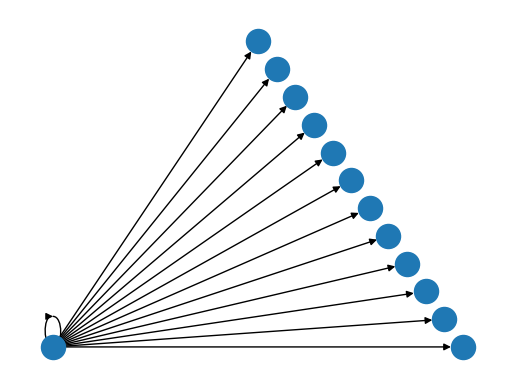

In [74]:
import matplotlib.pyplot as plt
start = 'https://en.wikipedia.org/wiki/Example'
target = 'https://en.wikipedia.org/wiki/Melbourne'
# nx.shortest_path(wiki_network, start, target)
pos = nx.planar_layout(wiki_network)
nx.draw_networkx_nodes(wiki_network, pos)
nx.draw_networkx_edges(wiki_network, pos)
labels = {node: str(node).split("/")[-1] for node in wiki_network.nodes()}
#nx.draw_networkx_labels(wiki_network, pos, labels, font_size=6)
plt.axis("off")
plt.show()

In [70]:
nx.set_node_attributes(wiki_network, {l:l.split("/")[-1] for l in wiki_network}, 'label')
nx.write_gexf(wiki_network, "Egypt-1.gexf")